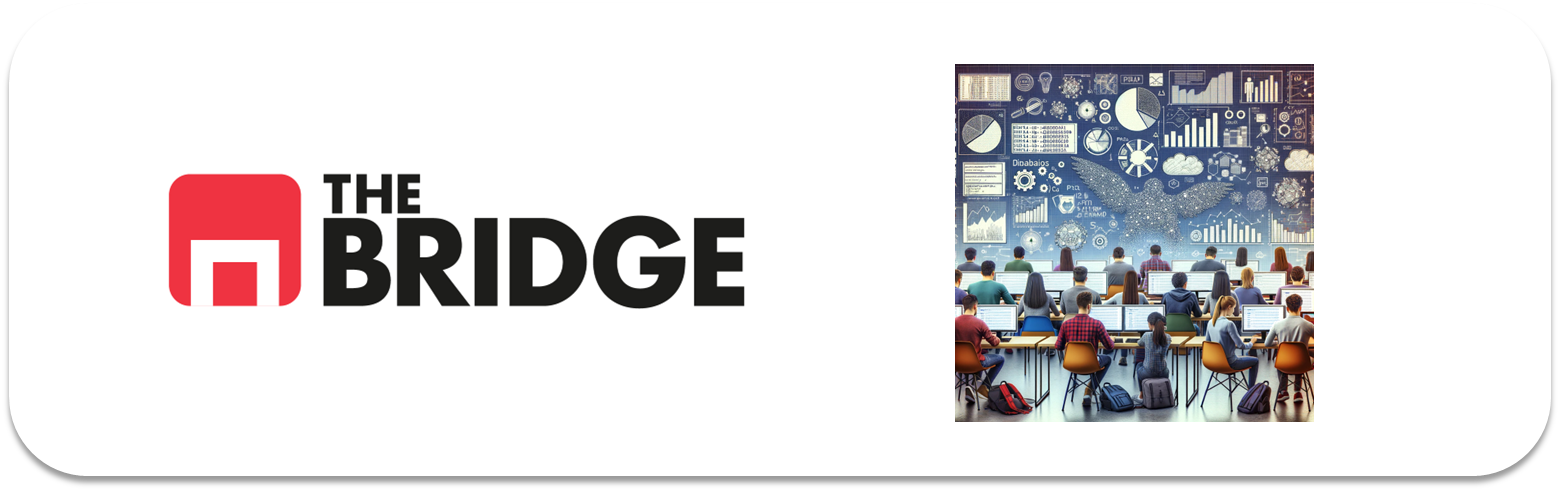

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [437]:
# Importamos los paquetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [438]:
# Punto 1. Cargo el dataset del titanic
df_titanic = pd.read_csv('./data/titanic.csv')

In [439]:
# Vamos a revisar otra vez las features
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [440]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [441]:
# Punto 2. Limpiamos y nos deshacemos de las variables que no voy a utilizar
# En primer lugar vemos survived y alive son el mismo dato pero en numérico y texto. Eliminamos alive
# La columna alone no tiene sentido si atendemos sibsp y parch porque dan los mismos datos. Eliminamos parch y sibsp.
# La columna adult_male no da ninguna información adicional que no de ya la columa who. Eliminamos adult_male.
# La columna class es la misma que pclass. Eliminamos class.
# La columna embarked_town da la misma información que embarked. Eliminamos embark_town
# La columna who da la misma info que sex. En los niños no nos interesaría de primeras saber el sexo. Eliminamos sex.
# La columna deck tiene demasiados nulos, la eliminamos tambien

# Vamos a cambiar los valores de las columnas categóricas por valores numéricos que la representen

from sklearn.preprocessing import LabelEncoder

# Convert categorical data to numerical data using LabelEncoder
le = LabelEncoder()
df_titanic['embarked'] = le.fit_transform(df_titanic['embarked'])
df_titanic['who'] = le.fit_transform(df_titanic['who'])
df_titanic['alone'] = le.fit_transform(df_titanic['alone'])

# View the converted DataFrame
print(df_titanic)
df_titanic.drop(['alive','parch','sibsp','adult_male','class','embark_town','sex','deck'],axis = 1, inplace = True)
df_titanic.head()



     survived  pclass     sex   age  sibsp  parch     fare  embarked   class  \
0           0       3    male  22.0      1      0   7.2500         2   Third   
1           1       1  female  38.0      1      0  71.2833         0   First   
2           1       3  female  26.0      0      0   7.9250         2   Third   
3           1       1  female  35.0      1      0  53.1000         2   First   
4           0       3    male  35.0      0      0   8.0500         2   Third   
..        ...     ...     ...   ...    ...    ...      ...       ...     ...   
886         0       2    male  27.0      0      0  13.0000         2  Second   
887         1       1  female  19.0      0      0  30.0000         2   First   
888         0       3  female   NaN      1      2  23.4500         2   Third   
889         1       1    male  26.0      0      0  30.0000         0   First   
890         0       3    male  32.0      0      0   7.7500         1   Third   

     who  adult_male deck  embark_town 

,survived,pclass,age,fare,embarked,who,alone
0,0,3,22.0,7.2500,2,1,0
1,1,1,38.0,71.2833,0,2,0
2,1,3,26.0,7.9250,2,2,1
3,1,1,35.0,53.1000,2,2,0
4,0,3,35.0,8.0500,2,1,1


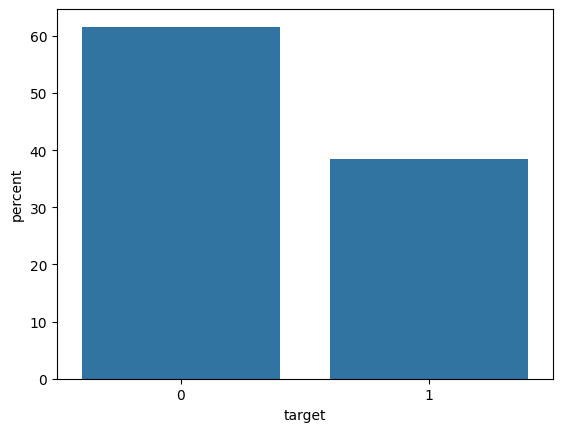

In [442]:
# Punto 3. La variable target es survived. La vamos a renombrar y analizar gráficamente
df_titanic.rename(columns = {'survived':'target'},inplace = True)
sns.countplot(data=df_titanic, x='target',stat='percent');

In [443]:
# Vemos que existe un ligero balanceo hacia el no sobrevivir aunque no es excesivo.
# Como el numero de pasajeros que no sobreviven es mayor es posible que el modelo tienda a predecir esa no supervivencia
# para tener un accuracy mayor, puede que nos interese medir con el Recall ya que contabilizará cuantos positivos acierto
# entre el total de los que son positivos
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   target    891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   age       714 non-null    float64
 3   fare      891 non-null    float64
 4   embarked  891 non-null    int32  
 5   who       891 non-null    int32  
 6   alone     891 non-null    int64  
dtypes: float64(2), int32(2), int64(3)
memory usage: 41.9 KB


In [444]:
# Punto 4. Realizamos el split en train y test con un stratify para garantizar que queda igual en ambos conjuntos.
# Como embarked tiene 2 valores nulos y stratify no puede trabajar con ellos elimino esas dos filas

df_titanic.dropna(subset=['embarked'],inplace=True)

train, test = train_test_split(df_titanic, test_size=0.2, stratify=df_titanic['embarked'], random_state=42)
print(train.shape)
print(test.shape)


(712, 7)
(179, 7)


In [445]:
# Punto 5. Realizamos las parejas X, y de train y test
X_train = train.drop(columns = ['target'])
y_train = train['target']
X_test = test.drop(columns = ['target'])
y_test = test['target']

In [446]:
# Punto 6. buscamos medias y modas y las imputamos en train
medias = X_train.mean()
medianas = X_train.median()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 631 to 170
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   age       574 non-null    float64
 2   fare      712 non-null    float64
 3   embarked  712 non-null    int32  
 4   who       712 non-null    int32  
 5   alone     712 non-null    int64  
dtypes: float64(2), int32(2), int64(2)
memory usage: 33.4 KB


In [447]:
# Vemos que faltan varios datos de age. Vamos a ver como están distribuidos
X_train.age.describe()

count    574.000000
mean      29.780645
std       14.585931
min        0.670000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

<Axes: ylabel='age'>

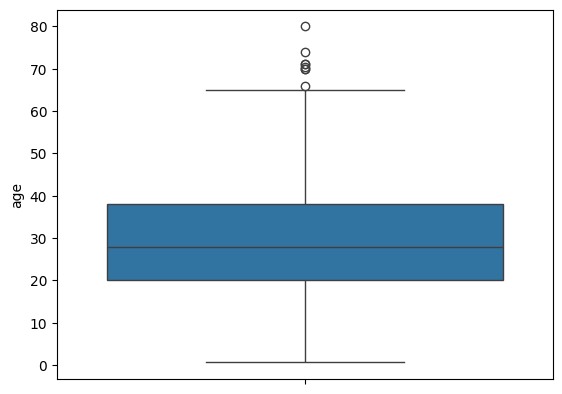

In [448]:
sns.boxplot(X_train['age'])

In [449]:
# Vemos que se trata de datos con cierta simetría sobre la media estándo la media centrada entre los valores más altos
# y más bajos. La mediana y la moda están muy cerca por lo que vamos a dar a los valores que falten el valor de la media

condicion = X_train['age'].isna()
X_train[condicion] = X_train['age'].astype('float').mean()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 631 to 170
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    float64
 1   age       712 non-null    float64
 2   fare      712 non-null    float64
 3   embarked  712 non-null    float64
 4   who       712 non-null    float64
 5   alone     712 non-null    float64
dtypes: float64(6)
memory usage: 38.9 KB


C:\Users\juanmanu.gomez\AppData\Local\Temp\ipykernel_21744\1494320487.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.780644599303137' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train[condicion] = X_train['age'].astype('float').mean()
C:\Users\juanmanu.gomez\AppData\Local\Temp\ipykernel_21744\1494320487.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.780644599303137' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_train[condicion] = X_train['age'].astype('float').mean()
C:\Users\juanmanu.gomez\AppData\Local\Temp\ipykernel_21744\1494320487.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.780644599303137' has dtype incompatible with i

In [450]:
# 1.7 Hacemos un mini-EDA

df_eda = X_train.copy()
df_eda["target"] = y_train.copy()

In [451]:
# Pintamos la matriz de correlacion.
df_eda.corr()

,pclass,age,fare,embarked,who,alone,target
pclass,1.000000,-0.026029,-0.076329,0.996834,0.995521,0.997347,-0.071778
age,-0.026029,1.000000,0.087009,-0.002912,0.017078,0.007484,-0.041716
fare,-0.076329,0.087009,1.000000,-0.057591,-0.030310,-0.048178,0.256957
embarked,0.996834,-0.002912,-0.057591,1.000000,0.996633,0.997628,-0.060334
who,0.995521,0.017078,-0.030310,0.996633,1.000000,0.998155,-0.034325
alone,0.997347,0.007484,-0.048178,0.997628,0.998155,1.000000,-0.055789
target,-0.071778,-0.041716,0.256957,-0.060334,-0.034325,-0.055789,1.000000


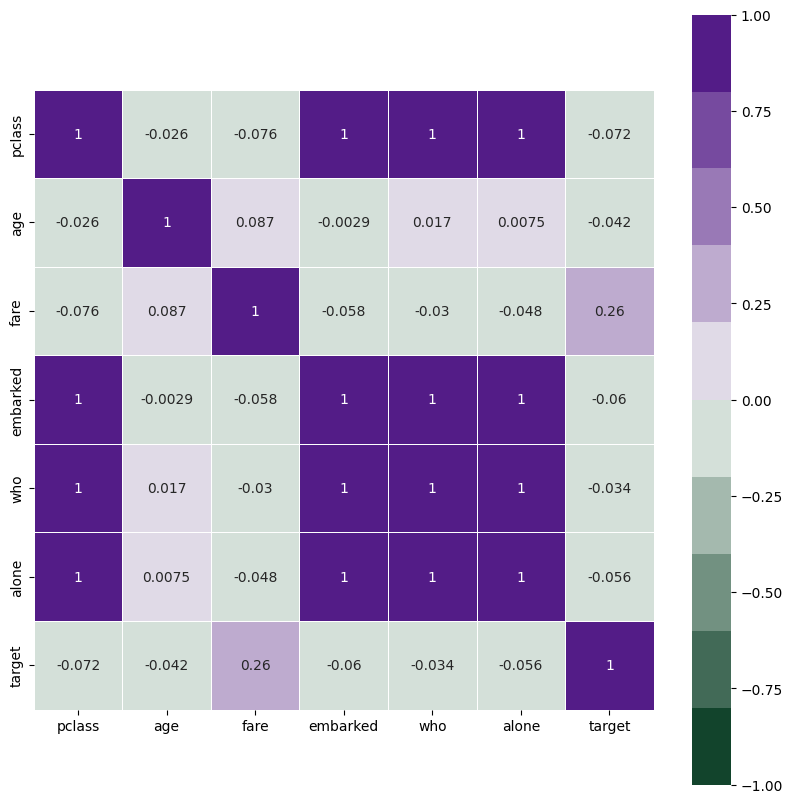

In [452]:
plt.figure(figsize=(10,10))
sns.heatmap(df_eda.corr(),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            linewidths=.5);

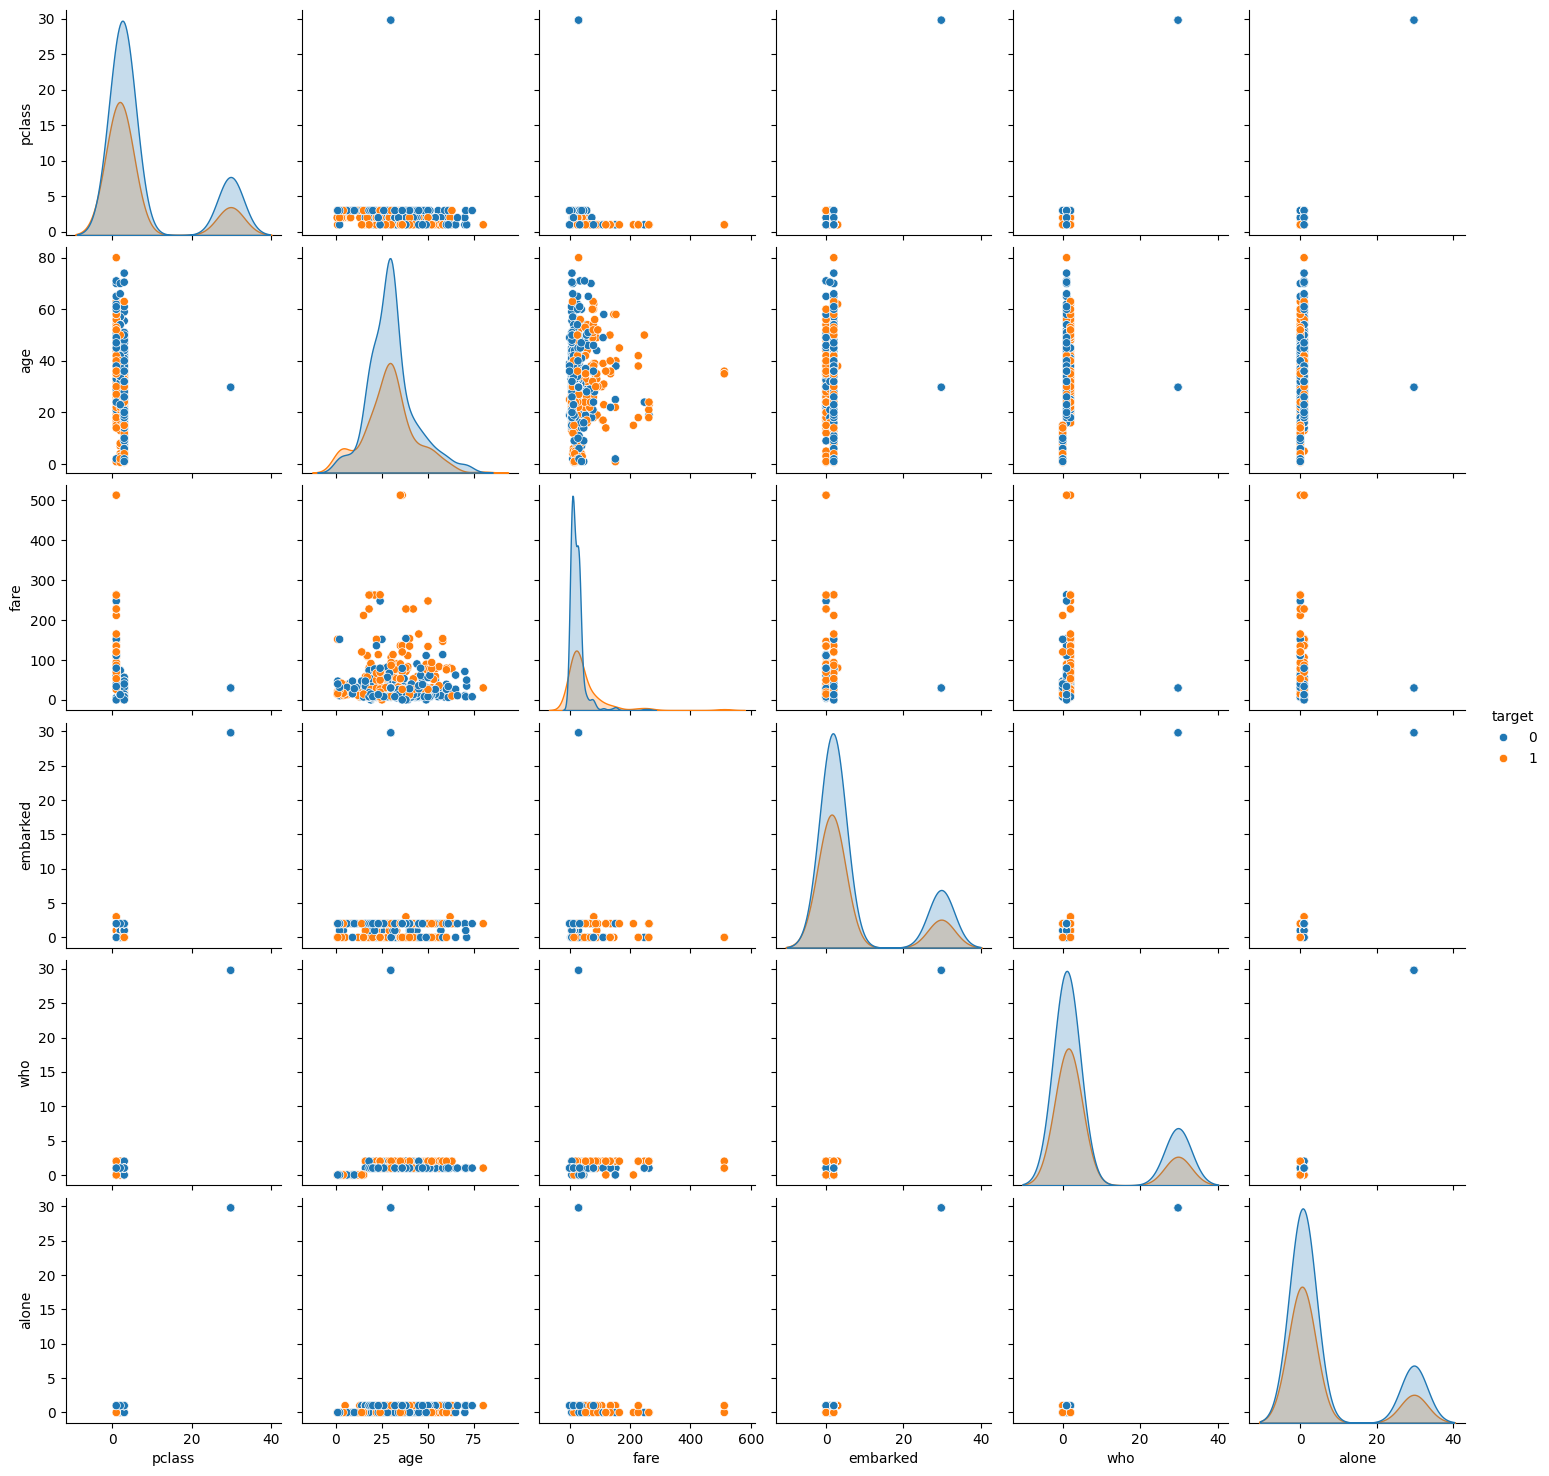

In [453]:
sns.pairplot(df_eda, hue = "target")

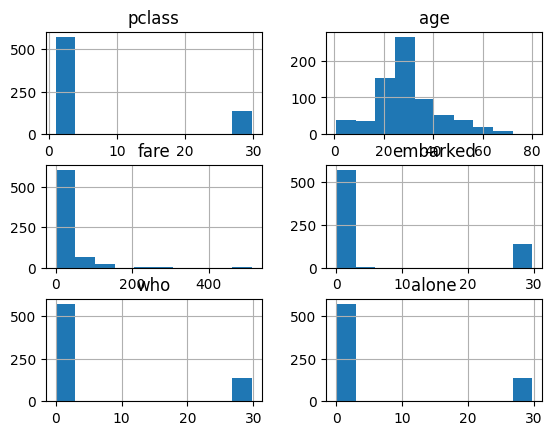

In [454]:
X_train.hist();

In [455]:
# Parece que hay solo algo de correlación con la variable fare, el resto tienen muy poca relacion.
# En principio nos quedaríamos con ella

X_train = pd.DataFrame(X_train['fare'])
X_train
# Parece que no quedan más valores nulos

,fare
631,7.054200
627,77.958300
671,52.000000
230,83.475000
617,16.100000
...,...
179,0.000000
733,13.000000
464,29.780645
95,29.780645


In [456]:
# Punto 1.8. Vemos que el histograma de fare tiene una forma de cola alargada. Para poder trabajar bien con ella
# necesitaremos transformar logaritmicamente. Al tener algunos valores de 0 en el dataframe el logaritmo nos dará infinito
# por ello vamos cambiar ese valor por el de la media

condicion = X_train['fare']==0
X_train[condicion] = medias['fare']


In [457]:
# Ahora aplicamos el logaritmo

X_train['fare'] = X_train['fare'].apply(np.log)
X_train

,fare
631,1.953623
627,4.356174
671,3.951244
230,4.424547
617,2.778819
...,...
179,3.459773
733,2.564949
464,3.393859
95,3.393859


<Axes: >

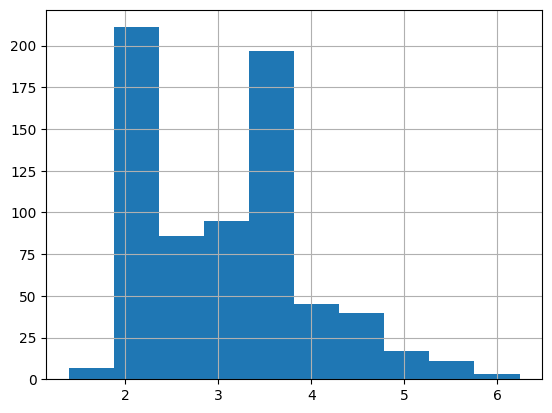

In [458]:
X_train['fare'].hist()

In [459]:
# Punto 1.9. Construimos un modelo de regresion logistica

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 15000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

In [460]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)


[[0.73609064]]
[-2.77264607]
[0 1]


In [461]:
# Punto 1.10. Analisis de coeficientes.
# dado que me he quedado con solo una feature, no hay más análisis que el valor del coeficiente para el feature

In [462]:
# Punto 1.11. Procesamos el dataset de test para poder usarlo

# En primer lugar eliminamos todas las columnas menos la de 'fare'
X_test = pd.DataFrame(X_test['fare'])
condicion = X_test['fare']==0
X_test[condicion] = medias['fare']
X_test['fare'] = X_test['fare'].apply(np.log)

In [463]:
# Punto 1.12. Evaluamos el modelo contra el dataset de test y train. 
# Obtenemos las matrices de confusión y las métricas adecuadas. 
# Hacemos un pequeño assesment de su generabilidad.
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, log_reg.predict(X_train))
print(acc_train)

0.6741573033707865


In [464]:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test, log_reg.predict(X_test))
print(acc_test)

0.6480446927374302


In [465]:
# Vemos que el modelo tiene una accuracy del 67% y se mantiene con el test que no es mal valor inicialmente.
# Revisamos con validacion cruzada
from sklearn import model_selection
name='Logistic Regression'
cv_results = model_selection.cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.6993007  0.65734266 0.6971831  0.63380282 0.68309859]
Logistic Regression: 0.674146 (0.025114)


In [466]:
# Sigue manteniendose un valor similar con validacion cruzada. Evaluamos el modelo

from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

y_proba = log_reg.predict_proba(X_test)
y_pred = log_reg.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in log_reg.classes_], 
                  columns=[f"Predicho {i}" for i in log_reg.classes_])

cm

,Predicho 0,Predicho 1
Real 0,92,17
Real 1,46,24


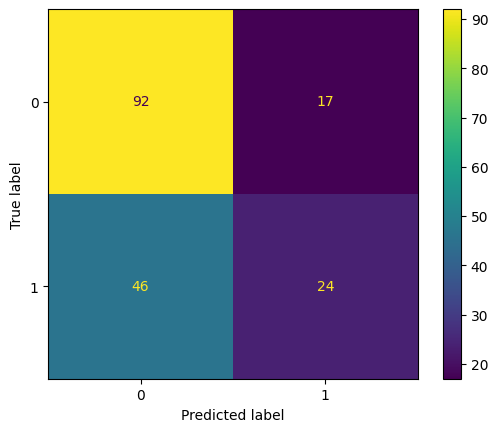

In [467]:
# Gráficamente

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


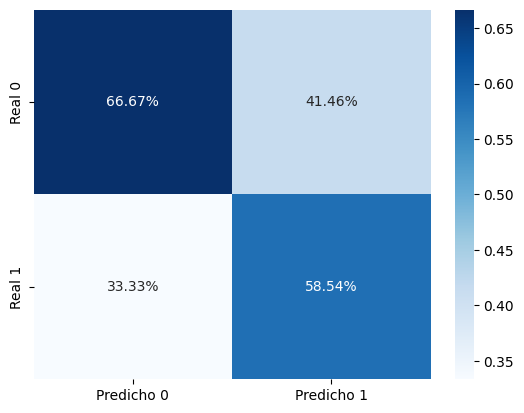

In [468]:
# Con porcentajes

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

In [469]:
# Realizamos las métricas MICRO y MACRO

micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)

MICRO PRECISION: 0.6480446927374302
MACRO PRECISION: 0.6260162601626016
MICRO RECALL: 0.6480446927374302
MACRO RECALL: 0.5934469200524246
MICRO ACCURACY: 0.6480446927374302


In [470]:
# Sacamos el informe final

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74       109
           1       0.59      0.34      0.43        70

    accuracy                           0.65       179
   macro avg       0.63      0.59      0.59       179
weighted avg       0.63      0.65      0.62       179



C:\Users\juanmanu.gomez\AppData\Local\Temp\ipykernel_21744\1369146528.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.780644599303137' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train[condicion] = X_train['age'].astype('float').mean()
C:\Users\juanmanu.gomez\AppData\Local\Temp\ipykernel_21744\1369146528.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.780644599303137' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_train[condicion] = X_train['age'].astype('float').mean()
C:\Users\juanmanu.gomez\AppData\Local\Temp\ipykernel_21744\1369146528.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.780644599303137' has dtype incompatible wit

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'embarked'}>],
       [<Axes: title={'center': 'who'}>,
        <Axes: title={'center': 'alone'}>]], dtype=object)

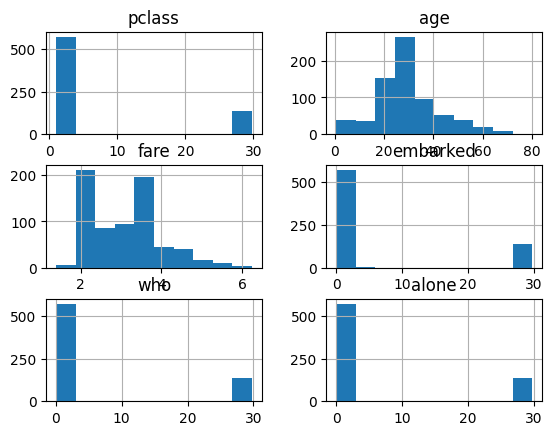

In [471]:
# Vemos que siempre el resultado no es malo pero vamos a intentar ver que pasa
# si incluimos más variables.
# Vamos a repetir los pasos pero incluyendo más variables

# Realizamos las parejas X, y de train y test
X_train = train.drop(columns = ['target'])
y_train = train['target']
X_test = test.drop(columns = ['target'])
y_test = test['target']

# buscamos medias y modas y las imputamos en train
medias = X_train.mean()
medianas = X_train.median()

# Ajustamos age otra vez. La mediana y la moda están muy cerca por lo que vamos a dar a los valores que falten el valor de la media
condicion = X_train['age'].isna()
X_train[condicion] = X_train['age'].astype('float').mean()

# Aplicamos el logaritmo al age
condicion = X_train['fare']==0
X_train.loc[condicion,'fare'] = medias['fare']
X_train['fare'] = X_train['fare'].apply(np.log)

X_train.hist()




In [472]:
# Nos falta escalar los valores

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in X_train:
    l_values = X_train[[col]]
    scaled_values = scaler.fit(l_values)
    X_train[[col]] = scaler.transform(l_values)

In [473]:
X_train

,pclass,age,fare,embarked,who,alone
631,-0.422513,1.621663,-1.281112,-0.454703,-0.507461,-0.452722
627,-0.606017,-0.671050,1.483392,-0.454703,-0.419050,-0.452722
671,-0.606017,0.093188,1.017457,-0.454703,-0.507461,-0.539262
230,-0.606017,0.398883,1.562066,-0.454703,-0.419050,-0.539262
617,-0.422513,-0.288931,-0.331597,-0.454703,-0.419050,-0.539262
...,...,...,...,...,...,...
179,-0.422513,0.475307,0.451944,-0.454703,-0.507461,-0.452722
733,-0.514265,-0.518203,-0.577687,-0.454703,-0.507461,-0.452722
464,2.034661,0.000000,0.376100,2.035502,2.037069,2.037956
95,2.034661,0.000000,0.376100,2.035502,2.037069,2.037956


In [474]:
# Construimos un modelo de regresion logistica
log_reg = LogisticRegression(max_iter = 15000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

In [475]:
# Vemos los coeficientes

print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.classes_)

[[-2.23039385 -0.31067318  0.57268051 -1.25830266  3.50171387 -0.21014189]]
[-0.51309528]
[0 1]


In [476]:
# Procesamos el dataset de test para poder usarlo

condicion = X_test['age'].isna()
X_test[condicion] = X_test['age'].astype('float').mean()

# Aplicamos el logaritmo al age
condicion = X_test['fare']==0
X_test.loc[condicion,'fare'] = medias['fare']
X_test['fare'] = X_test['fare'].apply(np.log)

scaler = StandardScaler()

for col in X_test:
    l_values = X_test[[col]]
    scaled_values = scaler.fit(l_values)
    X_test[[col]] = scaler.transform(l_values)

C:\Users\juanmanu.gomez\AppData\Local\Temp\ipykernel_21744\90368311.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.364857142857144' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test[condicion] = X_test['age'].astype('float').mean()
C:\Users\juanmanu.gomez\AppData\Local\Temp\ipykernel_21744\90368311.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.364857142857144' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_test[condicion] = X_test['age'].astype('float').mean()
C:\Users\juanmanu.gomez\AppData\Local\Temp\ipykernel_21744\90368311.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.364857142857144' has dtype incompatible with int32, plea

In [477]:
# Metricas del nuevo modelo

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, log_reg.predict(X_train))
print(acc_train)

0.6980337078651685


In [478]:
# Hemos subido a 69,8%. Aplicamos validacion cruzada

from sklearn import model_selection
name='Logistic Regression'
cv_results = model_selection.cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.71328671 0.65034965 0.6971831  0.67605634 0.6971831 ]
Logistic Regression: 0.686812 (0.021731)


In [479]:
X_test

,pclass,age,fare,embarked,who,alone
704,-0.445637,-0.266519,-1.361818,-0.487060,-0.539383,-0.573645
557,1.890545,0.000000,0.270615,1.891032,1.892282,1.893367
212,-0.445637,-0.583346,-1.460905,-0.487060,-0.539383,-0.489632
235,1.890545,0.000000,0.270615,1.891032,1.892282,1.893367
871,-0.622857,1.396822,0.991109,-0.487060,-0.453655,-0.573645
...,...,...,...,...,...,...
226,-0.534247,-0.820966,-1.002433,-0.487060,-0.539383,-0.489632
320,-0.445637,-0.583346,-1.460905,-0.487060,-0.539383,-0.489632
810,-0.445637,-0.266519,-1.356581,-0.487060,-0.539383,-0.489632
309,-0.622857,0.050308,1.090093,-0.660866,-0.453655,-0.489632


In [480]:
# Vemos que tambien se incrementa
# Sigue manteniendose un valor similar con validacion cruzada. Evaluamos el modelo

y_proba = log_reg.predict_proba(X_test)
y_pred = log_reg.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in log_reg.classes_], 
                  columns=[f"Predicho {i}" for i in log_reg.classes_])

cm

,Predicho 0,Predicho 1
Real 0,100,9
Real 1,39,31


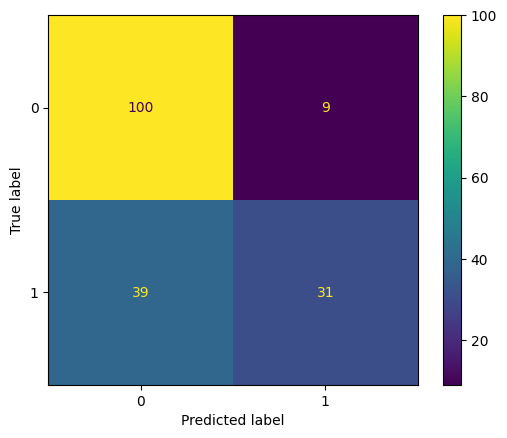

In [481]:
# Gráficamente

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


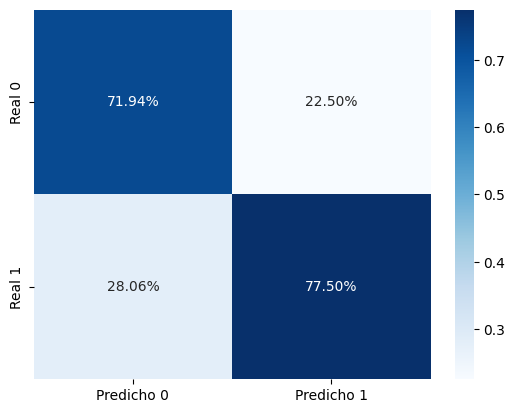

In [482]:
# Hemos amplicado el numero de aciertos. Vemos en porcentaje


sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

In [483]:
# Realizamos las métricas MICRO y MACRO

micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)

MICRO PRECISION: 0.7318435754189944
MACRO PRECISION: 0.7472122302158273
MICRO RECALL: 0.7318435754189944
MACRO RECALL: 0.6801441677588467
MICRO ACCURACY: 0.7318435754189944


In [484]:
# el Modelo ha mejorado bastante. Emitimos el informe

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       109
           1       0.78      0.44      0.56        70

    accuracy                           0.73       179
   macro avg       0.75      0.68      0.69       179
weighted avg       0.74      0.73      0.71       179

